In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

In [2]:
filepath = "C:/Users/to09267/Documents/A321XLR"
liste_file=os.listdir(filepath)
print (liste_file)

['A321-flare-compil.csv', 'A321-flare-compil_gmt_fromTSAS.xlsx', 'A321EIS_CAT3.csv', 'A321neo XLR - Auto Flight System Simulator Failure Test Report for CFM autoland certification - E22TRA240270 - 1.0 _ Attachments.zip', 'A321neo XLR - E22TRA240270 - 1.0 _ Attachments.zip', 'A321neo XLR - Vcar specification_E070RP1914663_v7.0.pdf', 'A321XLR - Raccourci.lnk', 'A321XLR.pdf', 'A321_CERTIF_EIS.csv', 'A321_df_extract_template.csv', 'A321_XLR_all_app.bdr', 'A321_XLR_all_app.csv', 'A321_XLR_NPA', 'ADIS', 'ADIS_36860_DESCRIPTION.pdf', 'allappA321xlr.xlsx', 'ALLM6839.bdr', 'ALLM6839.csv', 'ALL_APP_XLR - ALL_APP_XLR.dxp', 'ALTSTARSTUDY', 'APFDTCAS', 'APTCAS_S225S2253_PLOTS.pdf', 'ATHR in DIRECT ALTN LAW', 'ATHR IN DIRECT LAW', 'atld_pw_bdr - atld_pw_bdr.csv', 'atld_pw_bdr.bdr', 'atld_pw_bdr.csv', 'autoland_standard_59.csv', 'bdr_certif_eis_complet.csv', 'BSOFALTA', 'CADV Single Aisle Specific Computations for Studies.pdf', 'Calcul_de_vents', 'calcul_vent_Sandra_XLR_general_parameters', 'Calendri

In [230]:
file_name="M7877V0225_LFBT_FIRM_LDG5.csv"
data= pd.read_csv(os.path.join(filepath, file_name),sep=';',skiprows=0,header=(0))
data.head()

,GMT,GMTs,342105201-,342132401-,342132601-,RA1_RADIO_HEIGHT_BNR,RA2_RADIO_HEIGHT_BNR,XP_TP_M,342136401-,NZTFCOR1,...,CALC_CPXR,342136501-,VZEST_FGFTG1,VZEST_FGFTG2,VZI,VZ1I,VZ2I,CALC_CVZR,CALC_CVXR,Unnamed: 24
0,#FMT,NaN,E,E,E,E,E,E,E,E,...,E,I,E,E,E,E,E,E,E,NaN
1,#UNIT,NaN,deg A/s/s,deg A,deg/s,ft,ft,NaN,g,G,...,m,ft/min,UNKNOWN,UNKNOWN,ft/s,ft/s,ft/s,m/s,m/s,NaN
2,176-06:51:30-000.000,1.514469e+07,0.1015625,2.26318359375,-0.10546875,195.25,198.5,-734.108000417706,0,0,...,-740.902160644531,-824,-13.55712890625,-13.65771484375,0,0,0,-4.21603107452393,80.669548034668,NaN
3,176-06:51:30-062.500,1.514469e+07,-0.1640625,2.26318359375,-0.0078125,194.5,196.625,-734.108000417706,0.000122069999633823,0,...,-736.059814453125,-823,-13.57470703125,-13.666015625,0,0,0,-4.24750709533691,80.6848602294922,NaN
4,176-06:51:30-125.000,1.514469e+07,1.376953125,2.2686767578125,0.11328125,194,196.875,-726.039121138863,0.00170897995121777,0,...,-731.219299316406,-822,-13.68896484375,-13.7802734375,0,0,0,-4.26516103744507,80.6946487426758,NaN


In [231]:
df=data.drop(data.index[[0, 1]])

In [232]:
df.head()

,GMT,GMTs,342105201-,342132401-,342132601-,RA1_RADIO_HEIGHT_BNR,RA2_RADIO_HEIGHT_BNR,XP_TP_M,342136401-,NZTFCOR1,...,CALC_CPXR,342136501-,VZEST_FGFTG1,VZEST_FGFTG2,VZI,VZ1I,VZ2I,CALC_CVZR,CALC_CVXR,Unnamed: 24
2,176-06:51:30-000.000,1.514469e+07,0.1015625,2.26318359375,-0.10546875,195.25,198.5,-734.108000417706,0,0,...,-740.902160644531,-824,-13.55712890625,-13.65771484375,0,0,0,-4.21603107452393,80.669548034668,NaN
3,176-06:51:30-062.500,1.514469e+07,-0.1640625,2.26318359375,-0.0078125,194.5,196.625,-734.108000417706,0.000122069999633823,0,...,-736.059814453125,-823,-13.57470703125,-13.666015625,0,0,0,-4.24750709533691,80.6848602294922,NaN
4,176-06:51:30-125.000,1.514469e+07,1.376953125,2.2686767578125,0.11328125,194,196.875,-726.039121138863,0.00170897995121777,0,...,-731.219299316406,-822,-13.68896484375,-13.7802734375,0,0,0,-4.26516103744507,80.6946487426758,NaN
5,176-06:51:30-187.500,1.514469e+07,1.193359375,2.274169921875,0.06640625,195.25,194.75,-726.039121138863,-0.00195311999414116,0,...,-726.378479003906,-826,-13.759765625,-13.845703125,0,0,0,-4.2711501121521,80.6781158447266,NaN
6,176-06:51:30-250.000,1.514469e+07,-0.220703125,2.274169921875,0.0078125,196.5,195.5,-717.970464583486,-0.00512694008648396,0,...,-719.924743652344,-829,-13.74462890625,-13.8447265625,0,0,0,-4.28352975845337,80.6593551635742,NaN


In [233]:
liste = list(df)
print (liste)

['GMT', 'GMTs', '342105201-', '342132401-', '342132601-', 'RA1_RADIO_HEIGHT_BNR', 'RA2_RADIO_HEIGHT_BNR', 'XP_TP_M', '342136401-', 'NZTFCOR1', 'HRA1COR', 'NZTFCOR2', 'HRA2COR', 'VZ1', 'VZ2', 'CALC_CPXR', '342136501-', 'VZEST_FGFTG1', 'VZEST_FGFTG2', 'VZI', 'VZ1I', 'VZ2I', 'CALC_CVZR', 'CALC_CVXR', 'Unnamed: 24']


In [234]:
liste = list(df)
print (liste)

['GMT', 'GMTs', '342105201-', '342132401-', '342132601-', 'RA1_RADIO_HEIGHT_BNR', 'RA2_RADIO_HEIGHT_BNR', 'XP_TP_M', '342136401-', 'NZTFCOR1', 'HRA1COR', 'NZTFCOR2', 'HRA2COR', 'VZ1', 'VZ2', 'CALC_CPXR', '342136501-', 'VZEST_FGFTG1', 'VZEST_FGFTG2', 'VZI', 'VZ1I', 'VZ2I', 'CALC_CVZR', 'CALC_CVXR', 'Unnamed: 24']


In [235]:
df = df.rename(columns={ 'NZTFCOR1':'NZTFCOR1_TD','HRA1COR':'HRA1COR_TD','NZTFCOR2':'NZTFCOR2_TD','HRA2COR':'HRA2COR_TD'})

In [236]:
df = df.rename(columns={'342105201-': 'IR1_L052_PITCH_ACC_1', '342132401-': 'IR1_L324_PITCH_1','342132601-':'IR1_L326_BODY_P_RA_1','342136401-':'IR1_L364_VERT_ACC_1','342136501-':'IR1_L365_INERT_VS_1'})

In [237]:
df = df.rename(columns={'VZ1':'VZ1_TD','VZ2':'VZ2_TD','VZ2I':'VZI2_TD','VZ1I':'VZI1_TD'})

In [238]:
liste = list(df)

for data in liste:
    typ=type (df[data][2])
    print (data,typ)  

GMT <class 'str'>
GMTs <class 'numpy.float64'>
IR1_L052_PITCH_ACC_1 <class 'str'>
IR1_L324_PITCH_1 <class 'str'>
IR1_L326_BODY_P_RA_1 <class 'str'>
RA1_RADIO_HEIGHT_BNR <class 'str'>
RA2_RADIO_HEIGHT_BNR <class 'str'>
XP_TP_M <class 'str'>
IR1_L364_VERT_ACC_1 <class 'str'>
NZTFCOR1_TD <class 'str'>
HRA1COR_TD <class 'str'>
NZTFCOR2_TD <class 'str'>
HRA2COR_TD <class 'str'>
VZ1_TD <class 'str'>
VZ2_TD <class 'str'>
CALC_CPXR <class 'str'>
IR1_L365_INERT_VS_1 <class 'str'>
VZEST_FGFTG1 <class 'str'>
VZEST_FGFTG2 <class 'str'>
VZI <class 'str'>
VZI1_TD <class 'str'>
VZI2_TD <class 'str'>
CALC_CVZR <class 'str'>
CALC_CVXR <class 'str'>
Unnamed: 24 <class 'numpy.float64'>


In [239]:
print(liste)

['GMT', 'GMTs', 'IR1_L052_PITCH_ACC_1', 'IR1_L324_PITCH_1', 'IR1_L326_BODY_P_RA_1', 'RA1_RADIO_HEIGHT_BNR', 'RA2_RADIO_HEIGHT_BNR', 'XP_TP_M', 'IR1_L364_VERT_ACC_1', 'NZTFCOR1_TD', 'HRA1COR_TD', 'NZTFCOR2_TD', 'HRA2COR_TD', 'VZ1_TD', 'VZ2_TD', 'CALC_CPXR', 'IR1_L365_INERT_VS_1', 'VZEST_FGFTG1', 'VZEST_FGFTG2', 'VZI', 'VZI1_TD', 'VZI2_TD', 'CALC_CVZR', 'CALC_CVXR', 'Unnamed: 24']


In [240]:
#liste_num=['IR1_L052_PITCH_ACC_1', 'IR1_L324_PITCH_1', 'IR1_L326_BODY_P_RA_1', 'RA1_RADIO_HEIGHT_BNR', 'RA2_RADIO_HEIGHT_BNR', 'HRA2COR_TD', 'NZTFCOR1_TD', 'NZTFCOR2_TD', 'VZP_TP_I', 'HRA1COR_TD', 'XP_TP_M', 'VZ1_TD', 'VZ1I_TD', 'VZ2I_TD', 'VZ2_TD', 'CALCVZ2OK_TD', 'CALCVZ1OK_TD', 'IR1_L364_VERT_ACC_1', 'IR1_L365_INERT_VS_1']
liste_num=['IR1_L052_PITCH_ACC_1', 'IR1_L324_PITCH_1', 'IR1_L326_BODY_P_RA_1', 'RA1_RADIO_HEIGHT_BNR', 'RA2_RADIO_HEIGHT_BNR', 'HRA2COR_TD', 'NZTFCOR1_TD', 'NZTFCOR2_TD', 'HRA1COR_TD', 'VZ1_TD', 'VZ2_TD', 'IR1_L364_VERT_ACC_1', 'IR1_L365_INERT_VS_1','VZI1_TD', 'VZI2_TD','VZEST_FGFTG1','VZEST_FGFTG2','CALC_CVZR','CALC_CVXR']

for data in liste_num:
    typ=type (df[data][2])
    print (data,typ)  
    df[data]=pd.to_numeric(df[data], errors='coerce')

IR1_L052_PITCH_ACC_1 <class 'str'>
IR1_L324_PITCH_1 <class 'str'>
IR1_L326_BODY_P_RA_1 <class 'str'>
RA1_RADIO_HEIGHT_BNR <class 'str'>
RA2_RADIO_HEIGHT_BNR <class 'str'>
HRA2COR_TD <class 'str'>
NZTFCOR1_TD <class 'str'>
NZTFCOR2_TD <class 'str'>
HRA1COR_TD <class 'str'>
VZ1_TD <class 'str'>
VZ2_TD <class 'str'>
IR1_L364_VERT_ACC_1 <class 'str'>
IR1_L365_INERT_VS_1 <class 'str'>
VZI1_TD <class 'str'>
VZI2_TD <class 'str'>
VZEST_FGFTG1 <class 'str'>
VZEST_FGFTG2 <class 'str'>
CALC_CVZR <class 'str'>
CALC_CVXR <class 'str'>


In [241]:
df.describe()

,GMTs,IR1_L052_PITCH_ACC_1,IR1_L324_PITCH_1,IR1_L326_BODY_P_RA_1,RA1_RADIO_HEIGHT_BNR,RA2_RADIO_HEIGHT_BNR,IR1_L364_VERT_ACC_1,NZTFCOR1_TD,HRA1COR_TD,NZTFCOR2_TD,...,VZ1_TD,VZ2_TD,IR1_L365_INERT_VS_1,VZEST_FGFTG1,VZEST_FGFTG2,VZI1_TD,VZI2_TD,CALC_CVZR,CALC_CVXR,Unnamed: 24
count,2.410000e+02,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,...,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,0.0
mean,1.514470e+07,-0.165294,3.119000,-0.034119,77.099066,77.282676,0.028414,1.346118,20.262851,1.347229,...,-6.666514,-6.696993,-638.269710,-10.852447,-11.016040,-1.473621,-1.391049,-3.217672,80.351229,NaN
std,4.357181e+00,2.263274,1.255779,1.156952,65.159762,65.467962,0.059669,2.417595,30.892312,2.409907,...,7.788973,7.760203,319.250917,5.966202,5.878984,3.081842,2.909156,1.882332,0.653040,NaN
min,1.514469e+07,-9.750000,1.862183,-3.320312,-2.375000,-2.875000,-0.073730,-1.042746,-2.895970,-1.039312,...,-21.148401,-21.085936,-873.000000,-16.030273,-16.524414,-7.892057,-7.449838,-4.495039,77.824890,NaN
25%,1.514469e+07,-0.564453,2.345581,-0.183594,9.875000,10.375000,-0.005127,0.000000,0.000000,0.000000,...,-14.493856,-15.044651,-834.000000,-14.082031,-14.160645,0.000000,0.000000,-4.305706,80.572281,NaN
50%,1.514470e+07,-0.099609,2.499390,0.007812,70.500000,70.000000,0.003784,0.000000,0.000000,0.000000,...,-1.307258,-1.717341,-817.000000,-13.589844,-13.722656,0.000000,0.000000,-4.202784,80.642166,NaN
75%,1.514470e+07,0.585938,3.554077,0.187500,136.375000,138.250000,0.029541,2.051836,38.899288,2.049581,...,0.000000,0.000000,-528.000000,-12.796875,-12.954590,0.000000,0.000000,-3.153392,80.668564,NaN
max,1.514470e+07,8.845703,6.553345,2.507812,196.500000,198.500000,0.255248,9.627998,98.046753,9.537379,...,4.226273,4.693655,86.000000,9.033203,8.267090,0.000000,0.000000,1.393702,80.704536,NaN


In [242]:
#geometrical data A321 XLR
XRA1=32.436
ZRA1=-2.166
XRA2=34.289
ZRA2=-2.156
XTP=24.571
ZTP=-4.48
THETA01=6
THETA02=6
#RATP en m
XRA1TP=XRA1-XTP
ZRA1TP=ZRA1-ZTP
XRA2TP=XRA2-XTP
ZRA2TP=ZRA2-ZTP
#IRTP en feet
XIRTP=54.43
ZIRTP=8.07
degrad=3.141592654/180.
fts2=9.81/0.3048
mft=1/0.3048

In [243]:
df["CALC_CVZR_FTS"]=df["CALC_CVZR"]/0.3048

In [274]:
df["CALC_CVZR_SLOPE_CORRECTED"]=df["CALC_CVZR"]/0.3048-0.01*df["CALC_CVXR"]/0.3048

In [244]:
gk_1=5.2
gk_2=26
gk_3=5

In [245]:
#fonction pour corriger le radioaltimètre
def cor_hra (hra,theta,deltax,deltaz):
    OFFSET_RA_M=(np.cos(theta*degrad)-np.cos(THETA01*degrad))*deltaz-(np.sin(theta*degrad)-np.sin(THETA01*degrad))*deltax
    HRAC=hra-OFFSET_RA_M/0.3048
    return(HRAC)
    

In [246]:
#fonction pour l'init des calculs
def binit(hra):
    if (hra>100):
        binit=1
    else:
        binit=0
    return(binit)
    

In [247]:
def cor_nz(nzt,pitacc,pitrat,pitch):
    COR_NZ1=pitacc*degrad*(ZIRTP*np.sin(pitch*degrad)-XIRTP*np.cos(pitch*degrad))
    COR_NZ3=pitrat*pitrat*degrad*degrad*(ZIRTP*np.cos(pitch*degrad)-XIRTP*np.sin(pitch*degrad))
    nztcor=nzt*fts2+(COR_NZ1+COR_NZ3)
    return(nztcor)

In [248]:
GMT="073-09:41:22-000.000"
import re
def find_dates(text, pattern) :
    return re.findall(pattern, text)
text = "La date est le 09/02/2023 et l'autre date est le 12-12-2024"
pattern = r"\b(0[1-9]|1[0-2])[-/](0[1-9]|[12]\d|3[01])[-/](19\d\d|20\d\d)\b"
dates = find_dates(text, pattern)
print("Dates trouvées :", dates)

Dates trouvées : [('09', '02', '2023'), ('12', '12', '2024')]


In [249]:
#model=r"\d+-\d+:\d+:\d+-\d+.\d+"
model=r"^(\d{3})-(\d{2}):(\d{2}):(\d{2})-(\d{3}).(\d{3})"
dates = find_dates(GMT, model)[0]
print (dates)
(DD,HH,MM,SS,MS,MUS)=dates
print(DD,HH,MM,SS,MS,MUS)
GMT_S=float(HH)*3600+float(MM)*60+float(SS)+float(MS)/1000.
print(GMT_S)

('073', '09', '41', '22', '000', '000')
073 09 41 22 000 000
34882.0


In [250]:
#GMT="073-09:41:22-000.000"
def  convert_GMT(GMT):
    model=r"^(\d{3})-(\d{2}):(\d{2}):(\d{2})-(\d{3}).(\d{3})"
    dates = find_dates(GMT, model)[0]
    (DD,HH,MM,SS,MS,MUS)=dates
    GMT_S=float(HH)*3600+float(MM)*60+float(SS)+float(MS)/1000.
    return GMT_S
    
    

In [251]:

def third_order_filter(z,zpp,binit,vzinit,deltat):
    if binit==1:
        estz=z
        eps=0
        eint1=vzinit
        estvz=vzinit/60
        eint3=g_k3*eps
        estbias=0
        eint2=zpp-((g_k2*eps)+estbias)
        estbiasp=estbias
        estvzp=estvz
        estzp=estz
        eint1p=eint1
    else:
            eps=estzp-z
            eint3=g_k3*eps
            estbias=estbiasp+eint3*deltat
            eint2=zpp-((g_k2*eps)+estbias)
            estvz=estvzp+eint2*deltat
            eint1=estvz-g_k1*eps
            estz=estzp+eint1*deltat
            estbiasp=estbias
            estvzp=estvz
            estzp=estz
            eint1p=eint1
#    return (eint1,eint2,eint3,estz,estvz,eps,estbias)
    return (eint1,eint2,eint3,estz,estvz,eps,estbias)

In [252]:
#cor_hra (hra,theta,deltax,deltaz)
df[['HRACOR1']]=df.apply(lambda row: pd.Series(cor_hra(row["RA1_RADIO_HEIGHT_BNR"],row["IR1_L324_PITCH_1"],XRA1TP,ZRA1TP)),axis=1)

In [253]:
df[['HRACOR2']]=df.apply(lambda row: pd.Series(cor_hra(row["RA2_RADIO_HEIGHT_BNR"],row["IR1_L324_PITCH_1"],XRA1TP,ZRA1TP)),axis=1)

In [254]:
df[["GMT_S"]]=df.apply(lambda row: pd.Series(convert_GMT(row["GMT"])),axis=1)
df[["BINIT"]]=df.apply(lambda row: pd.Series(binit(row["RA2_RADIO_HEIGHT_BNR"])),axis=1)

In [255]:
df.tail()

,GMT,GMTs,IR1_L052_PITCH_ACC_1,IR1_L324_PITCH_1,IR1_L326_BODY_P_RA_1,RA1_RADIO_HEIGHT_BNR,RA2_RADIO_HEIGHT_BNR,XP_TP_M,IR1_L364_VERT_ACC_1,NZTFCOR1_TD,...,VZI1_TD,VZI2_TD,CALC_CVZR,CALC_CVXR,Unnamed: 24,CALC_CVZR_FTS,HRACOR1,HRACOR2,GMT_S,BINIT
238,176-06:51:44-750.000,1.514470e+07,-0.228516,2.455444,-2.378906,-0.875,-0.875,447.811812370084,-0.067993,0.319035,...,-7.892057,-7.449838,0.317833,78.210556,NaN,1.042761,-2.501352,-2.501352,24704.750,0
239,176-06:51:44-812.500,1.514470e+07,-1.367188,2.312622,-2.285156,-0.875,-0.875,455.638107825071,-0.048950,0.062647,...,-7.892057,-7.449838,0.432032,78.127892,NaN,1.417426,-2.566405,-2.566405,24704.812,0
240,176-06:51:44-875.000,1.514470e+07,0.781250,2.180786,-2.175781,-0.750,-0.500,455.638107825071,-0.026367,-0.009639,...,-7.892057,-7.449838,0.527839,78.096710,NaN,1.731756,-2.501418,-2.251418,24704.875,0
241,176-06:51:44-937.500,1.514470e+07,-0.847656,2.032471,-2.683594,-0.875,-0.875,463.438489396591,-0.012085,-0.112197,...,-7.892057,-7.449838,0.729353,77.911232,NaN,2.392889,-2.693891,-2.693891,24704.937,0
242,176-06:51:45-000.000,1.514470e+07,-4.656250,1.862183,-2.878906,-1.000,-0.875,471.233516295441,0.001953,0.119753,...,-7.892057,-7.449838,0.864464,77.824890,NaN,2.836169,-2.896304,-2.771304,24705.000,0


In [256]:
#filtering données ADIRUS
binit=1
deltat=62.5
tau=500
a=2*tau/deltat
for elem in df.index:
    print (elem)
    nzt1= df.loc [elem,"IR1_L364_VERT_ACC_1"]
    pitacc1=df.loc [elem,"IR1_L052_PITCH_ACC_1"]
    pitrat1=df.loc [elem,"IR1_L326_BODY_P_RA_1"]
    if binit==1:
        nztf1=nzt1
        pitaccf1=pitacc1
        pitratf1=pitrat1

        binit=0
    else:
        nztf1=(a-1)/(a+1)*nztf1p+1/(a+1)*(nzt1+nzt1p)
        pitaccf1=(a-1)/(a+1)*pitaccf1p+1/(a+1)*(pitacc1+pitacc1p)
        pitratf1=(a-1)/(a+1)*pitratf1p+1/(a+1)*(pitrat1+pitrat1p)
            
    nzt1p=nzt1
    pitacc1p=pitacc1
    pitrat1p=pitrat1
    nztf1p=nztf1
    pitaccf1p=pitaccf1
    pitratf1p=pitratf1  
        
    df.loc [elem,"NZTF1"]=nztf1
    df.loc [elem,"PITACCF1"]=pitaccf1
    df.loc [elem,"PITRATF1"]=pitratf1
    
    print(elem,nztf1,pitaccf1,pitratf1)
    
    

2
2 0.0 0.1015625 -0.10546875
3
3 7.180588213752941e-06 0.0859375 -0.09972426470588236
4
4 0.00011404463376810555 0.1471737132352941 -0.08178795415224913
5
5 8.626643903518724e-05 0.28105401167820065 -0.06159598895786687
6
6 -0.0003403566761821877 0.3052039073631182 -0.04998359319811783
7
7 -0.0008819423711484244 0.2314988520851043 -0.03904802341010396
8
8 -0.001259283855880492 0.2242545018397979 -0.019978035361856435
9
9 -0.0015635098530748224 0.2985150016233511 0.0023631305630678508
10
10 -0.0020186398628791197 0.3430141558441333 0.020927026967412807
11
11 -0.0026356428163402173 0.30863381398011763 0.035009141441834826
12
12 -0.0031800571870411855 0.27829821821775086 0.053638580683971905
13
13 -0.0035670751687450755 0.3336776557803684 0.07811860060350462
14
14 -0.0040306316069876015 0.38265675510032504 0.09788038288544526
15
15 -0.004597624928382813 0.3310896000885221 0.11049188195774581
16
16 -0.004954301404276118 0.26042832360751955 0.12506636643330513
17
17 -0.004953070072407775 0

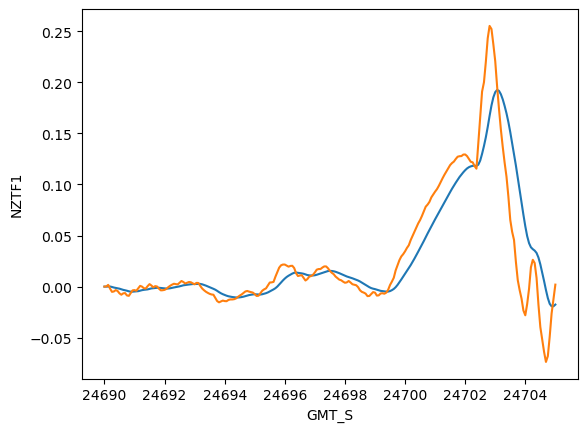

In [257]:
sns.lineplot(x="GMT_S", y="NZTF1",data=df)
sns.lineplot(x="GMT_S", y="IR1_L364_VERT_ACC_1",data=df)

plt.show()

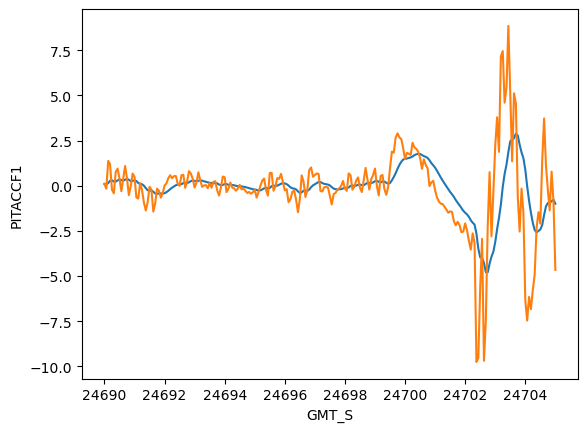

In [258]:
sns.lineplot(x="GMT_S", y="PITACCF1",data=df)
sns.lineplot(x="GMT_S", y="IR1_L052_PITCH_ACC_1",data=df)

plt.show()

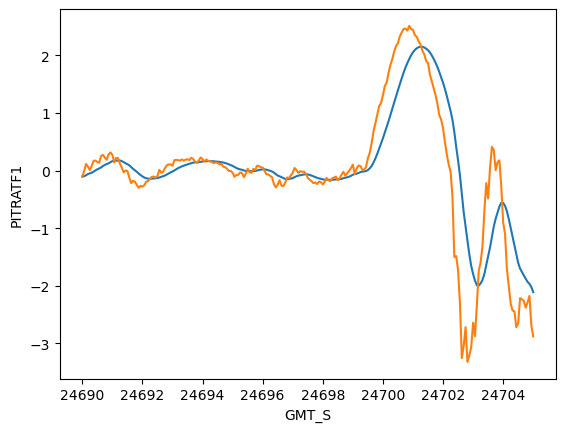

In [259]:
sns.lineplot(x="GMT_S", y="PITRATF1",data=df)
sns.lineplot(x="GMT_S", y="IR1_L326_BODY_P_RA_1",data=df)

plt.show()

In [260]:

df[['NZTFCOR1']]=df.apply(lambda row: pd.Series(cor_nz(row["IR1_L364_VERT_ACC_1"],row["IR1_L052_PITCH_ACC_1"],row["IR1_L326_BODY_P_RA_1"],row["IR1_L324_PITCH_1"])),axis=1)  
df[['NZTFCOR1F']]=df.apply(lambda row: pd.Series(cor_nz(row["NZTF1"],row["PITACCF1"],row["PITRATF1"],row["IR1_L324_PITCH_1"])),axis=1)   
    

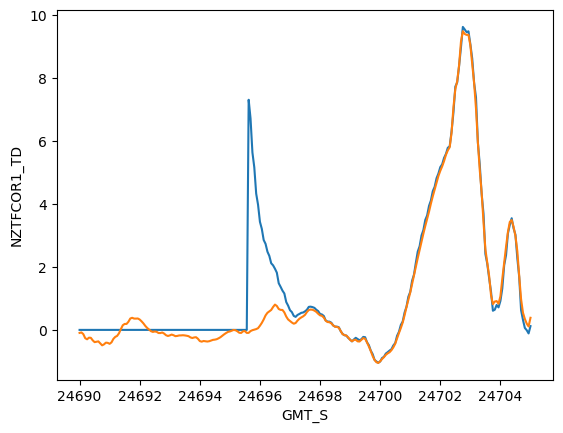

In [261]:
sns.lineplot(x="GMT_S", y="NZTFCOR1_TD",data=df)
sns.lineplot(x="GMT_S", y="NZTFCOR1F",data=df)

plt.show()

In [262]:
#filtre complementaire


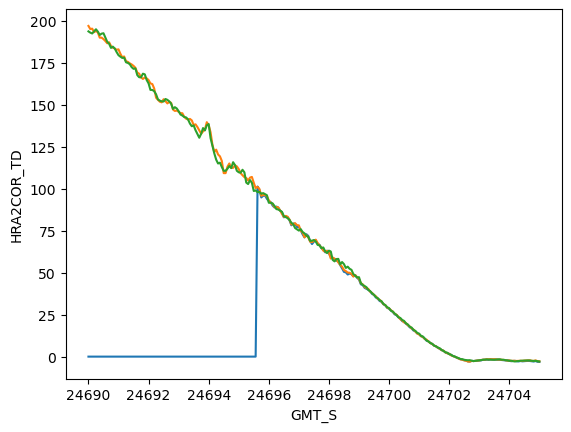

In [263]:
sns.lineplot(x="GMT_S", y="HRA2COR_TD",data=df)
sns.lineplot(x="GMT_S", y="HRACOR2",data=df)
sns.lineplot(x="GMT_S", y="HRACOR1",data=df)
#sns.lineplot(x="GMT_S", y="IR1_L324_PITCH_1",data=df)
plt.show()

In [264]:
print (list(df))

['GMT', 'GMTs', 'IR1_L052_PITCH_ACC_1', 'IR1_L324_PITCH_1', 'IR1_L326_BODY_P_RA_1', 'RA1_RADIO_HEIGHT_BNR', 'RA2_RADIO_HEIGHT_BNR', 'XP_TP_M', 'IR1_L364_VERT_ACC_1', 'NZTFCOR1_TD', 'HRA1COR_TD', 'NZTFCOR2_TD', 'HRA2COR_TD', 'VZ1_TD', 'VZ2_TD', 'CALC_CPXR', 'IR1_L365_INERT_VS_1', 'VZEST_FGFTG1', 'VZEST_FGFTG2', 'VZI', 'VZI1_TD', 'VZI2_TD', 'CALC_CVZR', 'CALC_CVXR', 'Unnamed: 24', 'CALC_CVZR_FTS', 'HRACOR1', 'HRACOR2', 'GMT_S', 'BINIT', 'NZTF1', 'PITACCF1', 'PITRATF1', 'NZTFCOR1', 'NZTFCOR1F']


In [265]:

for elem in df.index:

    binit=df.loc [elem,"BINIT"]
    z=df.loc [elem,"HRACOR1"]
    zpp=df.loc [elem,"NZTFCOR1F"]
#    z=df.loc [elem,"HRA1COR_TD"]
#    zpp=df.loc [elem,"NZTFCOR1_TD"]
    vzinit=df.loc [elem,"IR1_L365_INERT_VS_1"]/60
    deltat=62.5/1000
    if binit==1:
        estz=z
        eps=0
        eint1=vzinit
        estvz=vzinit
        eint3=gk_3*eps
        estbias=0
        eint2=zpp-((gk_2*eps)+estbias)

    else:
            eps=estzp-z
            eint3=gk_3*eps
            estbias=estbiasp+eint3*deltat
            eint2=zpp-((gk_2*eps)+estbias)
            estvz=estvzp+eint2*deltat
            eint1=estvz-gk_1*eps
            estz=estzp+eint1*deltat

    estbiasp=estbias
    estvzp=estvz
    estzp=estz
    eint1p=eint1
    

    df.loc [elem,"ESTBIAS"]=estbias
    df.loc [elem,"ESTVZ"]=estvz
    df.loc [elem,"ESTZ"]=estz
    df.loc [elem,"EINT1"]=eint1
    df.loc [elem,"EINT2"]=eint2
    df.loc [elem,"EINT3"]=eint3


            

In [266]:
df.tail()

,GMT,GMTs,IR1_L052_PITCH_ACC_1,IR1_L324_PITCH_1,IR1_L326_BODY_P_RA_1,RA1_RADIO_HEIGHT_BNR,RA2_RADIO_HEIGHT_BNR,XP_TP_M,IR1_L364_VERT_ACC_1,NZTFCOR1_TD,...,PITACCF1,PITRATF1,NZTFCOR1,NZTFCOR1F,ESTBIAS,ESTVZ,ESTZ,EINT1,EINT2,EINT3
238,176-06:51:44-750.000,1.514470e+07,-0.228516,2.455444,-2.378906,-0.875,-0.875,447.811812370084,-0.067993,0.319035,...,-0.955503,-1.878012,-1.962970,0.544821,0.162914,1.099399,-2.170118,-0.922986,-9.730018,1.944601
239,176-06:51:44-812.500,1.514470e+07,-1.367188,2.312622,-2.285156,-0.875,-0.875,455.638107825071,-0.048950,0.062647,...,-0.936955,-1.931426,-0.276151,0.349500,0.286754,0.459355,-2.270202,-1.601336,-10.240708,1.981434
240,176-06:51:44-875.000,1.514470e+07,0.781250,2.180786,-2.175781,-0.750,-0.500,455.638107825071,-0.026367,-0.009639,...,-0.861192,-1.966607,-1.577434,0.199840,0.359009,0.073681,-2.340742,-1.128644,-6.170790,1.156081
241,176-06:51:44-937.500,1.514470e+07,-0.847656,2.032471,-2.683594,-0.875,-0.875,463.438489396591,-0.012085,-0.112197,...,-0.763782,-2.021087,0.425022,0.108969,0.469368,-0.522711,-2.488185,-2.359085,-9.542267,1.765744
242,176-06:51:45-000.000,1.514470e+07,-4.656250,1.862183,-2.878906,-1.000,-0.875,471.233516295441,0.001953,0.119753,...,-0.997684,-2.110518,4.478469,0.385044,0.596905,-1.199147,-2.695770,-3.321368,-10.822970,2.040598


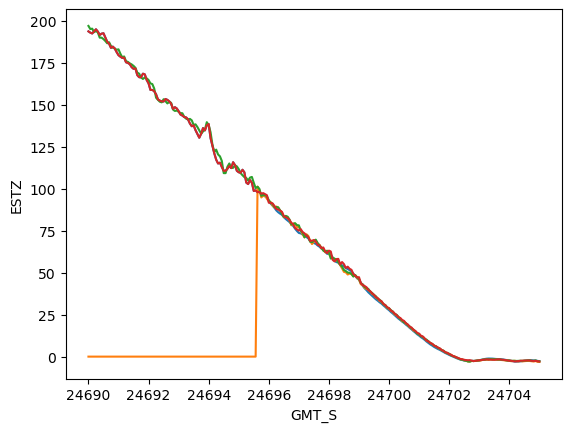

In [267]:
sns.lineplot(x="GMT_S", y="ESTZ",data=df)
sns.lineplot(x="GMT_S", y="HRA2COR_TD",data=df)
sns.lineplot(x="GMT_S", y="HRACOR2",data=df)
sns.lineplot(x="GMT_S", y="HRACOR1",data=df)
#sns.lineplot(x="GMT_S", y="IR1_L324_PITCH_1",data=df)
plt.show()


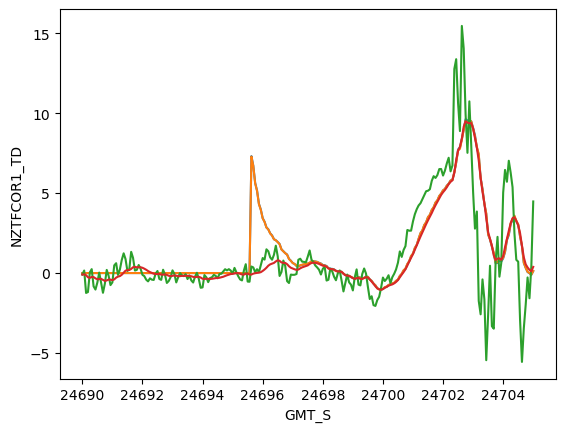

In [268]:
sns.lineplot(x="GMT_S", y="NZTFCOR1_TD",data=df)
sns.lineplot(x="GMT_S", y="NZTFCOR2_TD",data=df)
sns.lineplot(x="GMT_S", y="NZTFCOR1",data=df)
sns.lineplot(x="GMT_S", y="NZTFCOR1F",data=df)

plt.show()

In [269]:
print (type(df.index))
for elem in df.index:
    print (elem)
    hra1= df.loc [elem,"RA1_RADIO_HEIGHT_BNR"]
    hra2=df.loc [elem,"RA2_RADIO_HEIGHT_BNR"]
    pitch=df.loc [elem,"IR1_L324_PITCH_1"]
    hrac1=cor_hra (hra1,pitch,XRA1TP,ZRA1TP)
    hrac2=cor_hra (hra2,pitch,XRA2TP,ZRA2TP)
    df.loc [elem,"HRAC1"]=hrac1
    df.loc [elem,"HRAC2"]=hrac2
    print (hra1,hrac1,hra2,hrac2)
    

<class 'pandas.core.indexes.range.RangeIndex'>
2
195.25 193.53608608467587 198.5 196.39053573906253
3
194.5 192.78608608467587 196.625 194.51553573906253
4
194.0 192.28858683706977 196.875 194.76861901489875
5
195.25 193.54108764980276 194.75 192.6467023491633
6
196.5 194.79108764980276 195.5 193.3967023491633
7
195.125 193.41608764980276 194.625 192.5217023491633
8
193.125 191.42108945619395 191.5 189.40286919286407
9
193.875 192.17609150366556 191.5 189.40903626993807
10
194.125 192.43109379203366 190.625 188.5402035801586
11
191.5 189.81109632111438 189.5 187.42137112329883
12
189.0 187.31609909072372 188.125 186.0525388991321
13
187.875 186.1986036957266 188.75 186.6867909986852
14
185.375 183.7061088408843 186.5 184.44604362052195
15
186.125 184.4611125707688 185.5 183.45221232485935
16
185.0 183.3436186148047 185.0 182.96146581546773
17
182.875 181.22612519733963 184.25 182.22071982631846
18
181.0 179.3586323177526 184.5 182.47997435664598
19
180.125 178.49113997542258 181.875 17

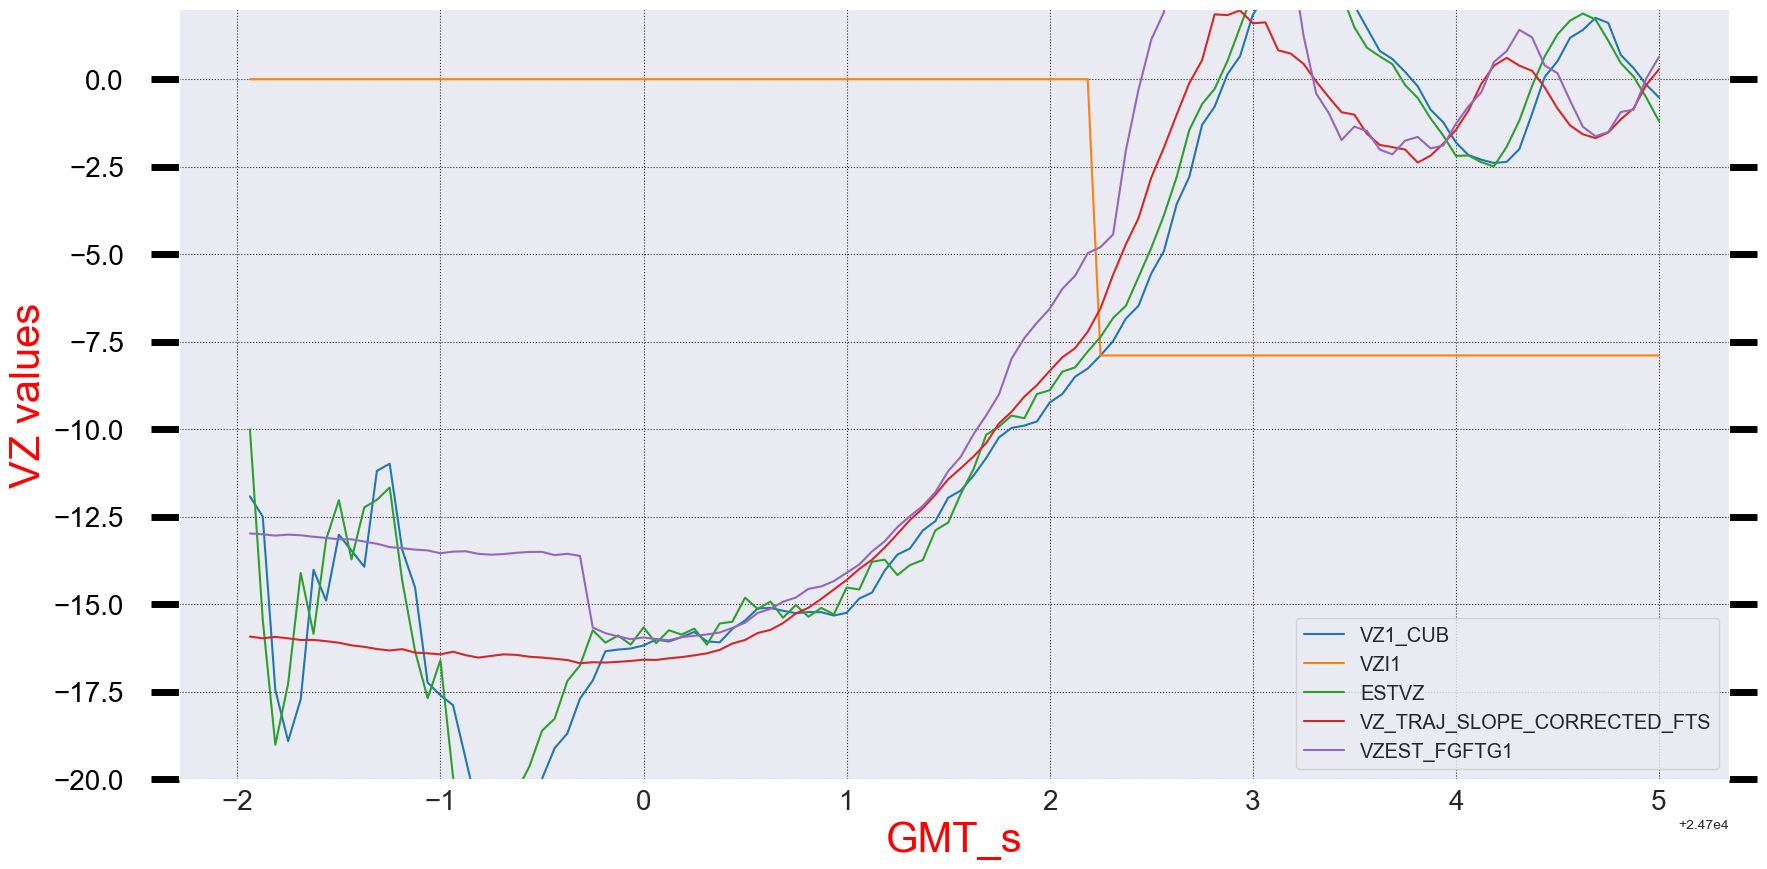

In [326]:
plt.figure(1, figsize = (20,10))
sns.set_style("darkgrid", {"grid.color": "0.2", "grid.linestyle": ":"})
axes = plt.gca()
axes.set_ylim(-20, 2)
#axes.yaxis.set_ticks(range(11))
axes.yaxis.set_tick_params(direction = 'out', length = 20, width = 5,
                           color = 'black', labelsize = 20, pad = 20,
                           labelcolor = 'black', right = True, left = True)
plt.gca().yaxis.set_tick_params(labelsize = 20)
plt.gca().xaxis.set_tick_params(labelsize = 20)
plt.ylabel('VZ values', fontsize = 30, color = 'red')
plt.xlabel('GMT_s', fontsize = 30, color = 'red')
sns.lineplot(x="GMT_S", y="VZ1_TD",data=dfplot,label = 'VZ1_CUB')
sns.lineplot(x="GMT_S", y="VZI1_TD",data=dfplot,label = 'VZI1')
#sns.lineplot(x="GMT_S", y="VZ1I_TD",data=dfplot)
#sns.lineplot(x="GMT_S", y="VZ2_TD",data=df)
#sns.lineplot(x="GMT_S", y="VZ2I_TD",data=df)
#sns.lineplot(x="GMT_S", y="VZP_TP_I",data=df)
sns.lineplot(x="GMT_S", y="ESTVZ",data=dfplot,label = 'ESTVZ')
sns.lineplot(x="GMT_S", y="CALC_CVZR_SLOPE_CORRECTED",data=dfplot,label = 'VZ_TRAJ_SLOPE_CORRECTED_FTS')
sns.lineplot(x="GMT_S", y="VZEST_FGFTG1",data=dfplot,label = 'VZEST_FGFTG1')
plt.legend(fontsize='x-large', title_fontsize='50')
plt.rcParams["axes.labelsize"] = 20

<Axes: xlabel='GMT_S', ylabel='VZ1_TD'>

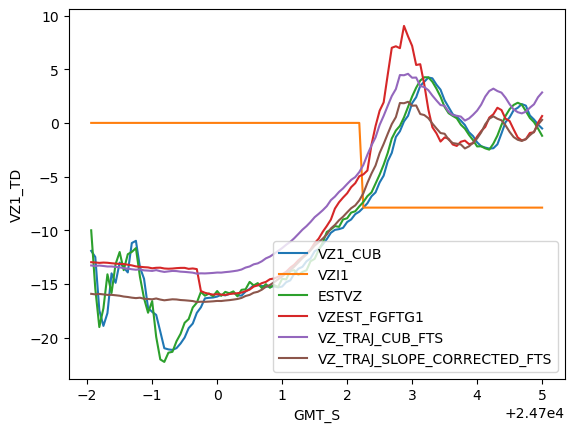

In [275]:
dfplot=df[(df.GMT_S>24698)]
sns.lineplot(x="GMT_S", y="VZ1_TD",data=dfplot,label = 'VZ1_CUB')
sns.lineplot(x="GMT_S", y="VZI1_TD",data=dfplot,label = 'VZI1')
#sns.lineplot(x="GMT_S", y="VZ1I_TD",data=dfplot)
#sns.lineplot(x="GMT_S", y="VZ2_TD",data=df)
#sns.lineplot(x="GMT_S", y="VZ2I_TD",data=df)
#sns.lineplot(x="GMT_S", y="VZP_TP_I",data=df)
sns.lineplot(x="GMT_S", y="ESTVZ",data=dfplot,label = 'ESTVZ')
sns.lineplot(x="GMT_S", y="VZEST_FGFTG1",data=dfplot,label = 'VZEST_FGFTG1')
sns.lineplot(x="GMT_S", y="CALC_CVZR_FTS",data=dfplot,label = 'VZ_TRAJ_CUB_FTS')
sns.lineplot(x="GMT_S", y="CALC_CVZR_SLOPE_CORRECTED",data=dfplot,label = 'VZ_TRAJ_SLOPE_CORRECTED_FTS')

In [271]:
dfplot.head()

,GMT,GMTs,IR1_L052_PITCH_ACC_1,IR1_L324_PITCH_1,IR1_L326_BODY_P_RA_1,RA1_RADIO_HEIGHT_BNR,RA2_RADIO_HEIGHT_BNR,XP_TP_M,IR1_L364_VERT_ACC_1,NZTFCOR1_TD,...,NZTFCOR1,NZTFCOR1F,ESTBIAS,ESTVZ,ESTZ,EINT1,EINT2,EINT3,HRAC1,HRAC2
131,176-06:51:38-062.500,1.514470e+07,-0.283203,2.318115,-0.195312,64.250,60.000,-88.8009063047357,0.004150,0.490099,...,0.400853,0.447262,-0.758785,-10.005579,60.904611,-2.062010,40.923894,-7.638047,62.561096,57.921371
132,176-06:51:38-125.000,1.514470e+07,0.685547,2.307129,-0.128906,59.250,60.625,-80.7384238094091,0.005493,0.441935,...,-0.470016,0.390579,0.287626,-15.440485,58.851313,-32.852776,-86.958501,16.742587,57.556094,58.540204
133,176-06:51:38-187.500,1.514470e+07,0.582031,2.296143,-0.167969,58.375,60.000,-80.7384238094091,0.004028,0.300414,...,-0.419489,0.292306,0.967383,-19.017412,56.955778,-30.328563,-57.230829,10.876106,56.676092,57.909036
134,176-06:51:38-250.000,1.514470e+07,-0.218750,2.285156,-0.187500,59.750,59.375,-72.6761047313921,0.002319,0.264510,...,0.281126,0.249777,0.626661,-17.269210,56.230803,-11.599589,27.971225,-5.451559,58.046089,57.277869
135,176-06:51:38-312.500,1.514470e+07,-0.054688,2.279663,-0.136719,59.875,57.750,-64.6134263421409,0.001831,0.262245,...,0.110571,0.243433,0.021103,-14.106414,55.978933,-4.029931,50.604746,-9.688926,58.168589,55.649786


<Axes: xlabel='GMT_S', ylabel='CALC_CVZR'>

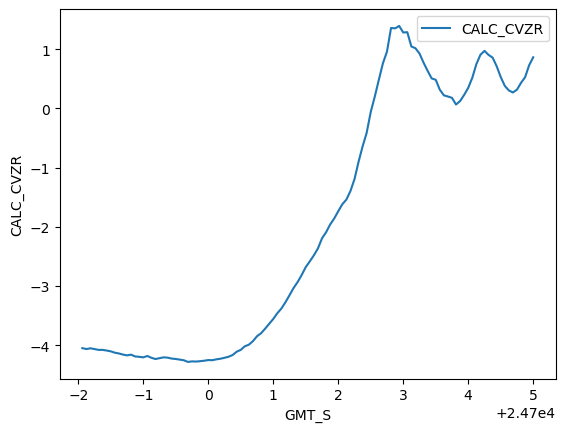

In [272]:
sns.lineplot(x="GMT_S", y="CALC_CVZR",data=dfplot,label = 'CALC_CVZR')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


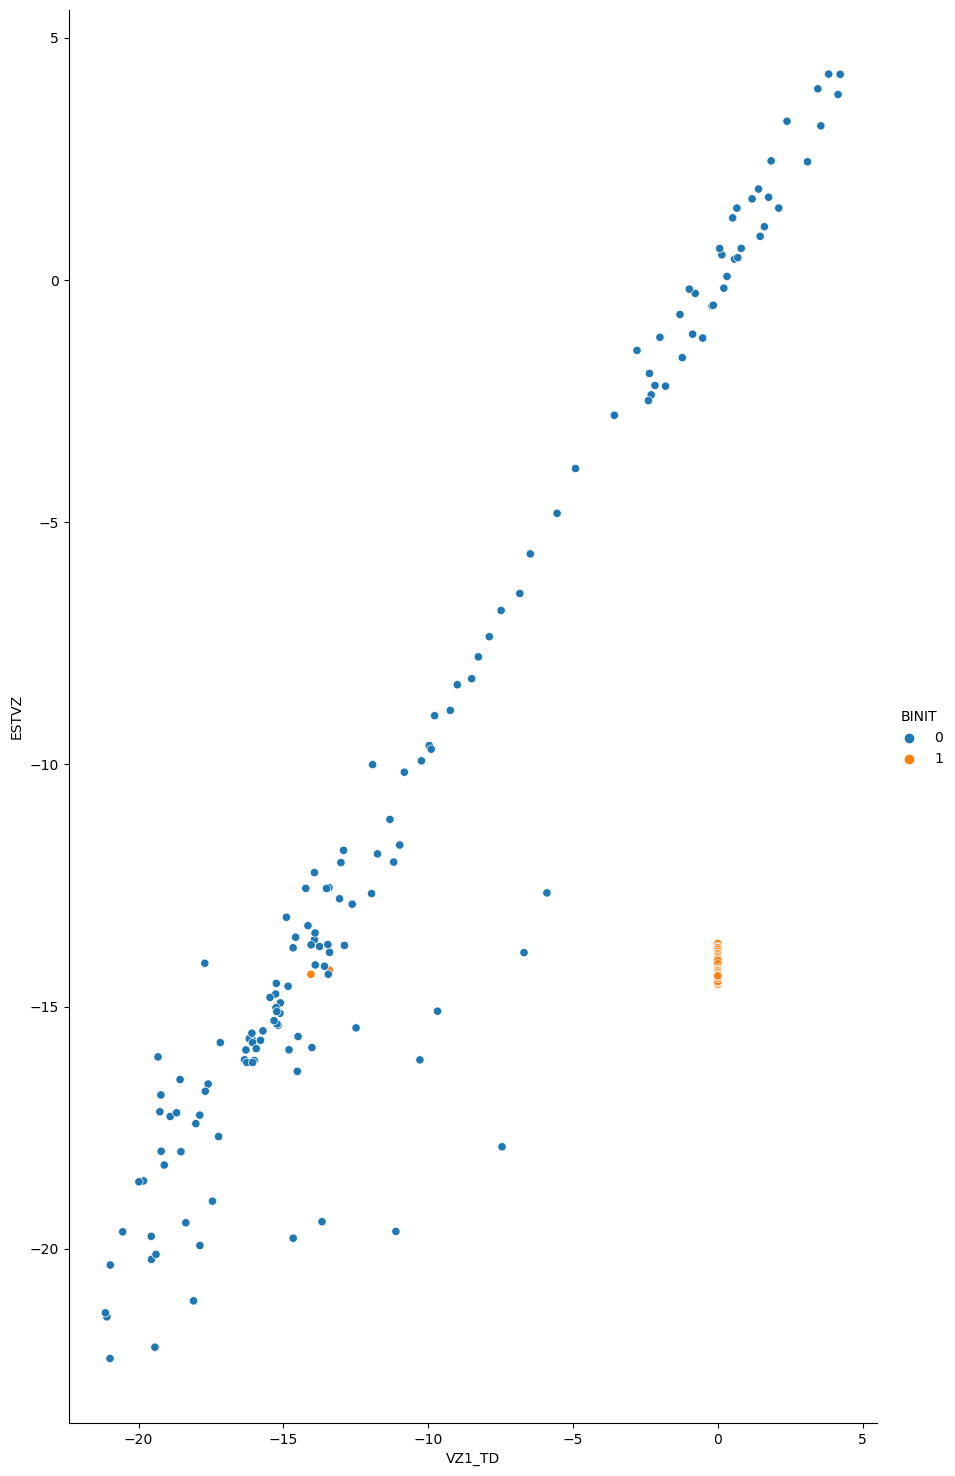

In [110]:
sns.pairplot(x_vars="VZ1_TD", y_vars="ESTVZ",hue="BINIT",data=df,size=15, aspect=0.6)
#sns.pairplot(x_vars="VZ2_TD", y_vars="ESTVZ",hue="BINIT",data=df,size=15, aspect=0.6)

In [111]:
hra1= df.loc [100,"RA1_RADIO_HEIGHT_BNR"]
pitch= df.loc [100,"IR1_L324_PITCH_1"]
print (hra1,pitch)

92.75 2.5872802734375


In [112]:
essai=cor_hra(float(hra1),float(pitch),XRA1TP,ZRA1TP)
print (essai)

91.1837329685249


In [113]:
essai=cor_hra(41.875,2.8619384765625,XRA1TP,ZRA1TP)

In [97]:
print (type(hra1))

<class 'str'>
